<a href="https://colab.research.google.com/github/marekrei/ml-examples/blob/main/ML_examples_01_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Examples - 01 - Linear Regression

Loading the necessary libraries and the dataset.

We are using an example dataset containing statistics about different countries.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

Loading and preparing the data. Splitting into train and test set.

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/marekrei/ml-examples/main/data/country-stats.csv')

X = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1)
Y = data["Enrolment Rate, Tertiary (%)"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

data.head()

,Country Name,GDP per Capita (PPP USD),Population Density (persons per sq km),Population Growth Rate (%),Urban Population (%),Life Expectancy at Birth (avg years),Fertility Rate (births per woman),Infant Mortality (deaths per 1000 births),"Enrolment Rate, Tertiary (%)","Unemployment, Total (%)",Estimated Control of Corruption (scale -2.5 to 2.5),Estimated Government Effectiveness (scale -2.5 to 2.5),Internet Users (%)
0,Afghanistan,1560.67,44.62,2.44,23.86,60.07,5.39,71.0,3.33,8.5,-1.41,-1.40,5.45
1,Albania,9403.43,115.11,0.26,54.45,77.16,1.75,15.0,54.85,14.2,-0.72,-0.28,54.66
2,Algeria,8515.35,15.86,1.89,73.71,70.75,2.83,25.6,31.46,10.0,-0.54,-0.55,15.23
3,Antigua and Barbuda,19640.35,200.35,1.03,29.87,75.50,2.12,9.2,14.37,8.4,1.29,0.48,83.79
4,Argentina,12016.20,14.88,0.88,92.64,75.84,2.20,12.7,74.83,7.2,-0.49,-0.25,55.80


## Linear Regression

Using LinearRegression from sklearn to fit the function: $y = ax + b$.

We can then evaluate it using root mean squared error (RMSE) and also get individual predictions from it.

In [3]:
from sklearn.linear_model import LinearRegression

X_train_single_feature = X_train["GDP per Capita (PPP USD)"].values.reshape(-1,1) # shaping input from a vector into a matrix
X_test_single_feature = X_test["GDP per Capita (PPP USD)"].values.reshape(-1,1)

model = LinearRegression(fit_intercept=True)
model.fit(X_train_single_feature, Y_train)

mse = np.square(Y_test - model.predict(X_test_single_feature)).mean()
print("RMSE: " + str(np.sqrt(mse)))

example_input = [[8515.35]] # expects a matrix
example_output = model.predict(example_input)
print("Prediction for " + str(example_input) + ": " + str(example_output))

We can also plot the resulting function.

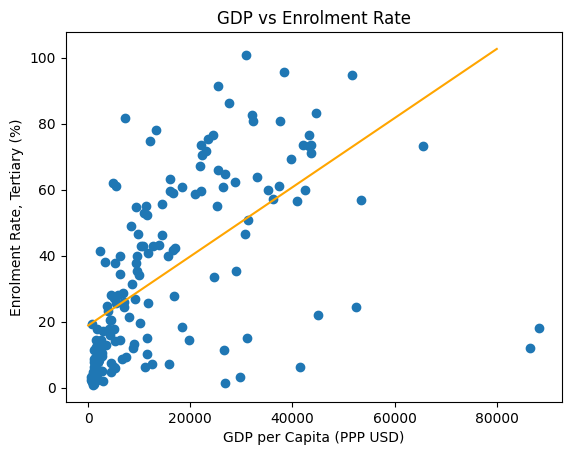

In [5]:
plt.scatter(data["GDP per Capita (PPP USD)"],
            data["Enrolment Rate, Tertiary (%)"])
plt.title('GDP vs Enrolment Rate')
plt.xlabel("GDP per Capita (PPP USD)")
plt.ylabel("Enrolment Rate, Tertiary (%)")

x_sample = np.linspace(0, 80000, 100)
plt.plot(x_sample,
         model.predict(x_sample.reshape(-1,1)),
         color='orange')
plt.show()

## Multiple Linear Regression

Predicting enrolment rate using all the available variables in the dataset.

We have to exclude the country name (because it's text and we can only handle numerical features at the moment) and enrolment rate itself (because using that would be cheating).

We can again evaluate it using RMSE. The result is now better (lower) than with regular linear regression, because the model is using more information.

In [6]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, Y_train)

mse = np.square(Y_test - model.predict(X_test)).mean()
print("RMSE: " + str(np.sqrt(mse)))

example_input = data.copy().drop(["Country Name", "Enrolment Rate, Tertiary (%)"], axis=1).iloc[[3]]
example_output = model.predict(example_input)
print("Prediction: " + str(example_output))

# XGBoost

XGBoost is a widely used tool that trains an ensemble of multiple weak models to perform the task, which often performs quite well. For comparison, we can also train an XGboost model on the same data.

In [8]:
dtrain = xgb.DMatrix(X_train, label=Y_train)
dtest = xgb.DMatrix(X_test, label=Y_test)

# Define the XGBoost model
model = xgb.XGBRegressor(
    objective="reg:squarederror",  # Regression task
    n_estimators=10,             # Number of trees
    learning_rate=0.1,            # Step size shrinkage
    max_depth=3,                  # Maximum tree depth
    random_state=42,               # Seed for reproducibility
)

# Train the model
model.fit(X_train, Y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(Y_test, predictions))
print(f"RMSE: " + str(rmse))

RMSE: 16.87264880786502
